In [1]:
#Import packages and read the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path=r"C:\Users\shaik\OneDrive\Documents\users\Data Science\Python\EDA\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**steps in outlier analysis**

-  step-1: find the Q1 ,Q2 and Q3
    - np.percentile(column data,q)
    
- step-2:   calulate the IQR
    
    - IQR=Q3-Q1
    
- step-3: calulate lower boundary and upper boundary
    
    - lb: Q1-1.5IQR
        
    - ub:Q3+1.5IQR
        
- step-4: find the outlier
    
    - c1: column data<lb
        
    - c2 column data>ub
    
    - c: apply the main condition
        
    - main data[c]    
        
   

In [3]:
#####------------- Step-1------###########
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

#####------------- Step-2------###########

IQR=Q3-Q1
#####------------- Step-3------###########
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

#####------------- Step-4------###########

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2

#####------------- Step-5------###########

outliers_df=visa_df[con]
outliers_df

#####------------- Step-6------###########

c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
con=c1&c2
non_outliers_df=visa_df[c1&c2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Compare original data with non outliers data**

will plot histogram and box plot of the both

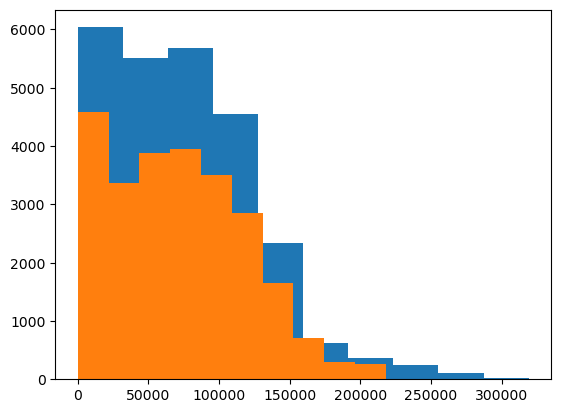

In [4]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

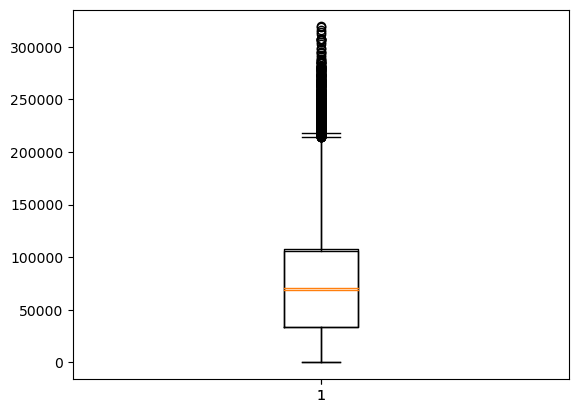

In [5]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

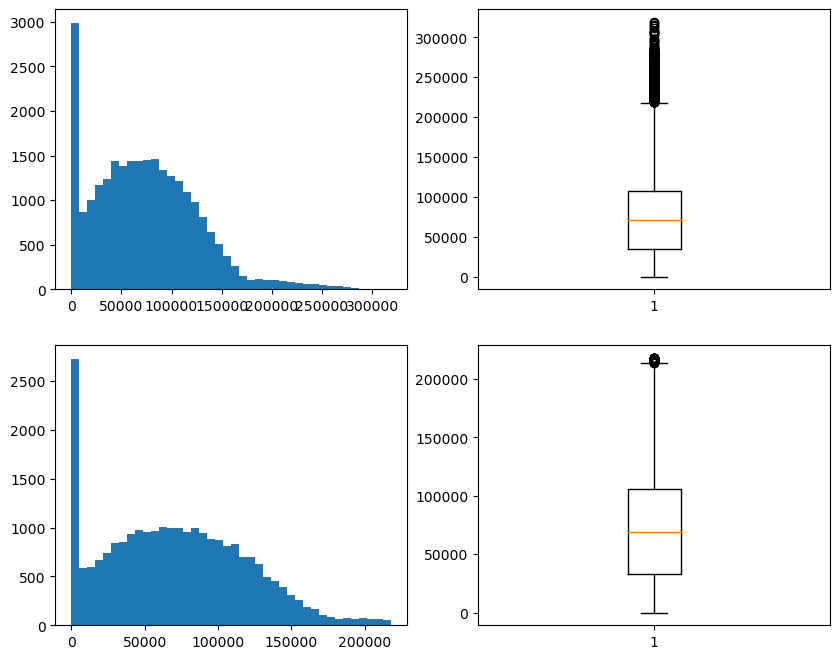

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea62516d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea625244d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea62516210>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea62525ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea624ee550>],
 'means': []}

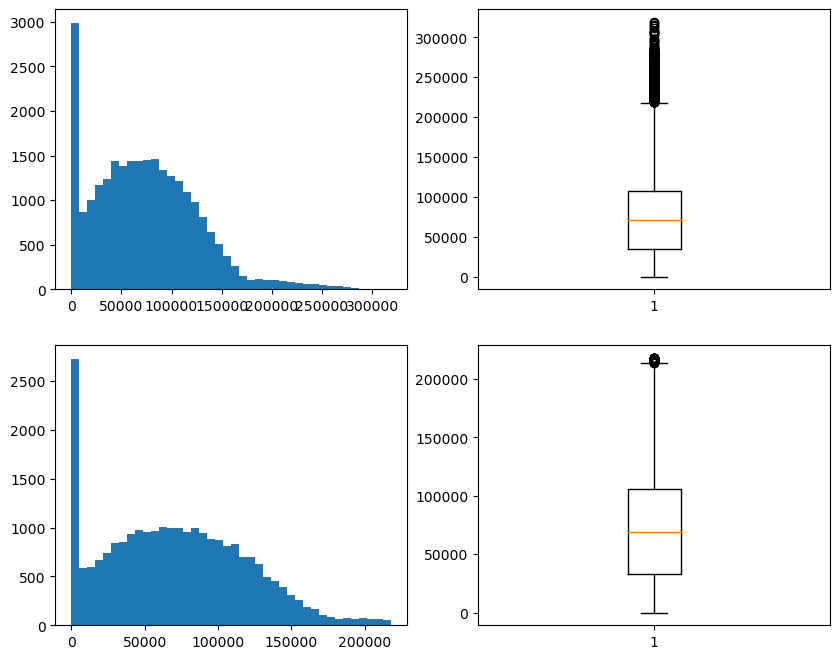

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])

## how to deal outliers:

**Drop the outliers**
    
    - we can drop thr outliers if outliers percentage <2%
    - but this is not recommended , we lost other columns data also
        
**Impute with median values**

    - As we know the Median does not affect by outliers
     - So it is good practice we can impute outliers with median value
    
**Cap with Q3 or Q1 value**

    - If outliers are present less than lower bound then fill with Q1
    - If outliers are more than upper bound then fill with Q3



In [8]:
# Task 3
# Read the each observation from prevailing wage
# if that observation <lb or >ub : fill with median value
# else: keep as it is

# take empty list =[]
# median= visa_df['pwage'].medain()
# for i in visa_df['pwage']:
# if i<lb or i>ub:
# emptylist.append(median)
# else:
# emptylist.append(i)
# 25480

In [17]:
median=[]
normal=[]
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
median_value=visa_df['prevailing_wage'].median()
IQR=Q3-Q1

lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

median= visa_df['prevailing_wage']
for i in visa_df:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)
        
visa_df['prevailing_wage']=list1        

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
##########################################################################################################################

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
list2=[]
for i in visa_df:
    if <lb or i>ub:
        

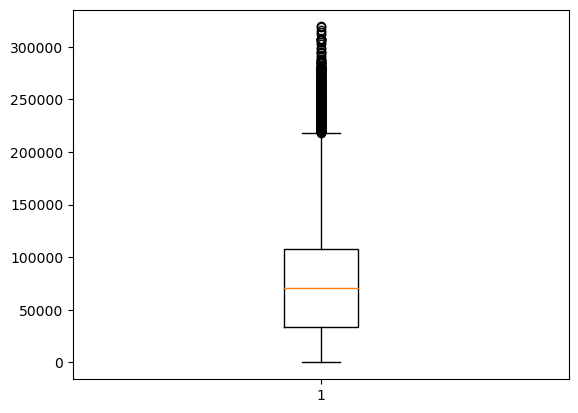

In [16]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data

path=r"C:\Users\shaik\OneDrive\Documents\users\Data Science\Python\EDA\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

- above replace one we use a traditional approach

- for loop ,list,if-else

- the same we can get by using np.where methoud

In [23]:
dict1={'Name':['A','B','C','D'],Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d

,Name,Num
0,A,1
1,B,2
2,C,3
3,D,4


#### np.where(con,True,False)

- will take 3 arguments
    - Condition
        - con=d['Num']>2
    - True value
        - t=100
    - False value
        - t=d['Num']

In [28]:
l=np.where(d['Num']>2,100,d['Num'])

d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


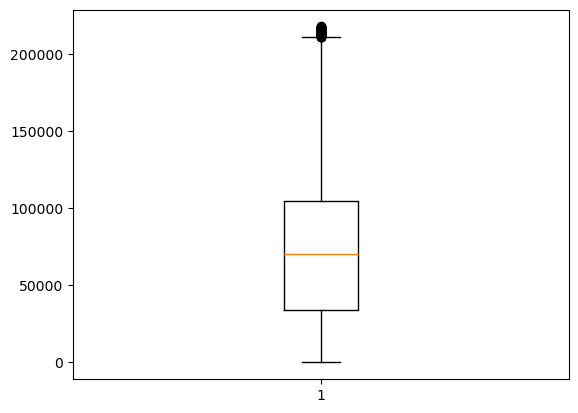

In [34]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

IQR=Q3-Q1

########========== step-3==========##########
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

median=visa_df['prevailing_wage'].median()

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
t=median
f=visa_df['prevailing_wage']

visa_df['prevailing_wage']=np.where(con,t,f)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

In [ ]:
dict1={'Name':['A','B','C','D'],Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d

list1=[]
       